In [2]:
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
import tensorflow as tf

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [37]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [4]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [23]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


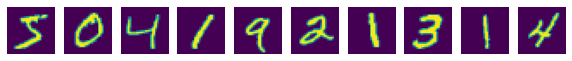

Lables= [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [24]:
plt.figure(figsize=(10,1))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.axis("off")
plt.show()
print("Lables=",y_train[:10])

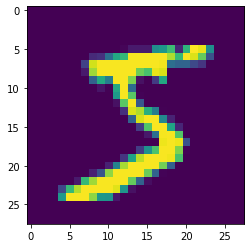

In [25]:
plt.imshow(x_train[0])

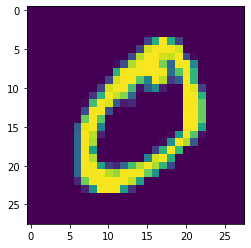

In [26]:
plt.imshow(x_train[1])

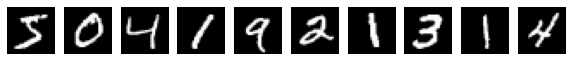

Lables= [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [27]:
plt.figure(figsize=(10,1))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.axis("off")
plt.show()
print("Lables=",y_train[:10])

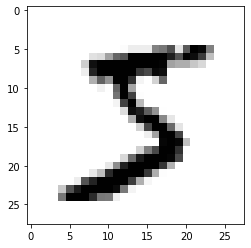

In [28]:
plt.imshow(x_train[0],cmap=plt.cm.binary) 

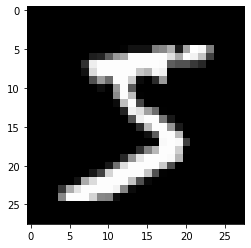

In [29]:
plt.imshow(x_train[0],cmap='gray')

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)


In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [16]:
batch_size = 8
num_classes = 10
epochs = 28

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])

In [17]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/28
7500/7500 [==============================] - 73s 10ms/step - loss: 1.5670 - accuracy: 0.5101 - val_loss: 1.2258 - val_accuracy: 0.7594
Epoch 2/28
7500/7500 [==============================] - 70s 9ms/step - loss: 1.4269 - accuracy: 0.5533 - val_loss: 1.0593 - val_accuracy: 0.7982
Epoch 3/28
7500/7500 [==============================] - 70s 9ms/step - loss: 1.3064 - accuracy: 0.5840 - val_loss: 0.9228 - val_accuracy: 0.8228
Epoch 4/28
7500/7500 [==============================] - 71s 9ms/step - loss: 1.2031 - accuracy: 0.6170 - val_loss: 0.8135 - val_accuracy: 0.8445
Epoch 5/28
7500/7500 [==============================] - 70s 9ms/step - loss: 1.1207 - accuracy: 0.6406 - val_loss: 0.7286 - val_accuracy: 0.8560
Epoch 6/28
7500/7500 [==============================] - 70s 9ms/step - loss: 1.0555 - accuracy: 0.6614 - val_loss: 0.6590 - val_accuracy: 0.8683
Epoch 7/28
7500/7500 [==============================] - 70s 9ms/step - loss: 1.0016 - accuracy: 0.6760 - val_loss: 0.6024 - val_a

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24399252235889435
Test accuracy: 0.9362000226974487


In [19]:
scores = model.evaluate(x_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 6.38%


In [31]:
prediction= model.predict(x_test)

In [32]:
print(prediction)

[[1.7891780e-05 6.7145615e-05 4.9554401e-06 ... 9.9914241e-01
  1.0488716e-05 6.5202668e-04]
 [1.6325735e-04 8.7369198e-04 9.8463690e-01 ... 1.0759377e-05
  5.3657492e-04 7.6331977e-05]
 [2.1729167e-04 9.9035549e-01 1.4664148e-03 ... 2.3652280e-03
  2.3772076e-03 6.3508813e-04]
 ...
 [1.8615276e-05 1.4311919e-03 4.2749036e-04 ... 1.1278429e-03
  5.7905456e-03 4.2065639e-02]
 [2.6803243e-03 3.0141817e-03 4.8186266e-04 ... 1.4539992e-03
  7.8475349e-02 3.0530279e-03]
 [1.2553922e-05 1.2061250e-05 8.9381495e-04 ... 1.2824705e-07
  1.6652955e-05 1.7978957e-05]]


In [33]:
print(np.argmax(prediction[1]))

2


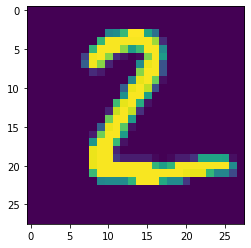

In [34]:
plt.imshow(x_test[1])

In [35]:
print(np.argmax(prediction[6788]))

5


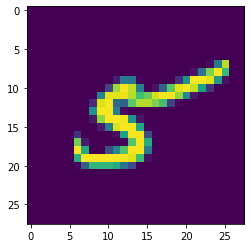

In [36]:
plt.imshow(x_test[6788])

In [20]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5
